In [1]:
import numpy as np
import scipy.stats as sp_stats
from matplotlib import pyplot as plt
import matplotlib.tri as tri

%matplotlib inline

## 2 classes

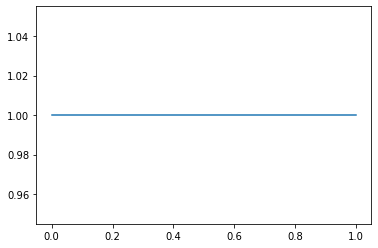

In [4]:
def py_z(z):
    return z

zs = np.linspace(1.e-4, 1-1.e-4, 100)
prior = np.ones_like(zs)

a, b = .5, .5
# prior = zs ** (a-1) * (1 - zs)**(b-1)
plt.plot(zs, prior)

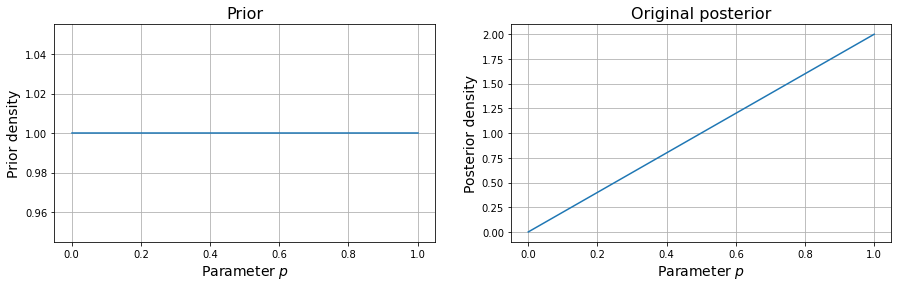

In [5]:
f, arr = plt.subplots(1, 2, figsize=(15, 4))
liks = py_z(zs)
posterior = liks * prior
posterior /= np.mean(posterior)

arr[0].plot(zs, prior)
arr[0].set_xlabel(r"Parameter $p$", fontsize=14)
arr[0].set_ylabel(r"Prior density", fontsize=14)
arr[0].set_title("Prior", fontsize=16)
arr[0].grid()

arr[1].plot(zs, posterior)
arr[1].set_xlabel(r"Parameter $p$", fontsize=14)
arr[1].set_ylabel(r"Posterior density", fontsize=14)
arr[1].set_title("Original posterior", fontsize=16)
arr[1].grid()

Text(0.5, 1.0, 'Tempered posterior, $T=0.1$')

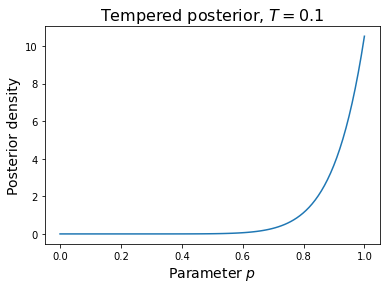

In [6]:
T = 0.1
liks_T = liks**(1/T)
posterior_T = liks_T / np.sum(liks_T) * len(zs)
plt.plot(zs, posterior_T)
plt.xlabel(r"Parameter $p$", fontsize=14)
plt.ylabel(r"Posterior density", fontsize=14)
plt.title(r"Tempered posterior, $T=0.1$", fontsize=16)

Text(0.5, 1.0, 'Logits scaled by, $T=0.03$')

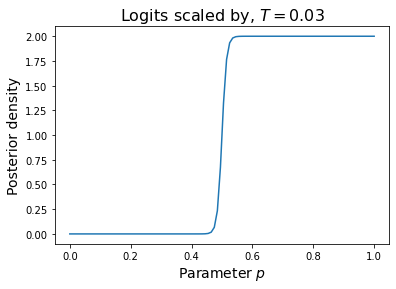

In [7]:
scale = 0.03
logits = np.log(zs / (1 - zs))
logits_scaled = logits / scale
zs_scaled = np.exp(logits_scaled) / (1 + np.exp(logits_scaled))
liks_scaled = py_z(zs_scaled)
posterior_scaled = liks_scaled / np.sum(liks_scaled) * len(zs)
plt.plot(zs, posterior_scaled)
plt.xlabel(r"Parameter $p$", fontsize=14)
plt.ylabel(r"Posterior density", fontsize=14)
plt.title(r"Logits scaled by, $T={}$".format(scale), fontsize=16)

In [8]:
# plt.plot(zs, (np.exp(logits) / scale + 1) / (np.exp(logits) + 1)**(1/scale))
# plt.xlabel(r"Parameter $p$", fontsize=14)
# plt.ylabel(r"Posterior density", fontsize=14)
# plt.title(r"Logits scaled by, $T={}$".format(scale), fontsize=16)

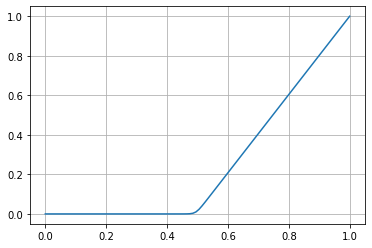

In [9]:
cdf_scaled = np.cumsum(posterior_scaled) / np.sum(posterior_scaled)
plt.plot(zs, cdf_scaled)
plt.grid()

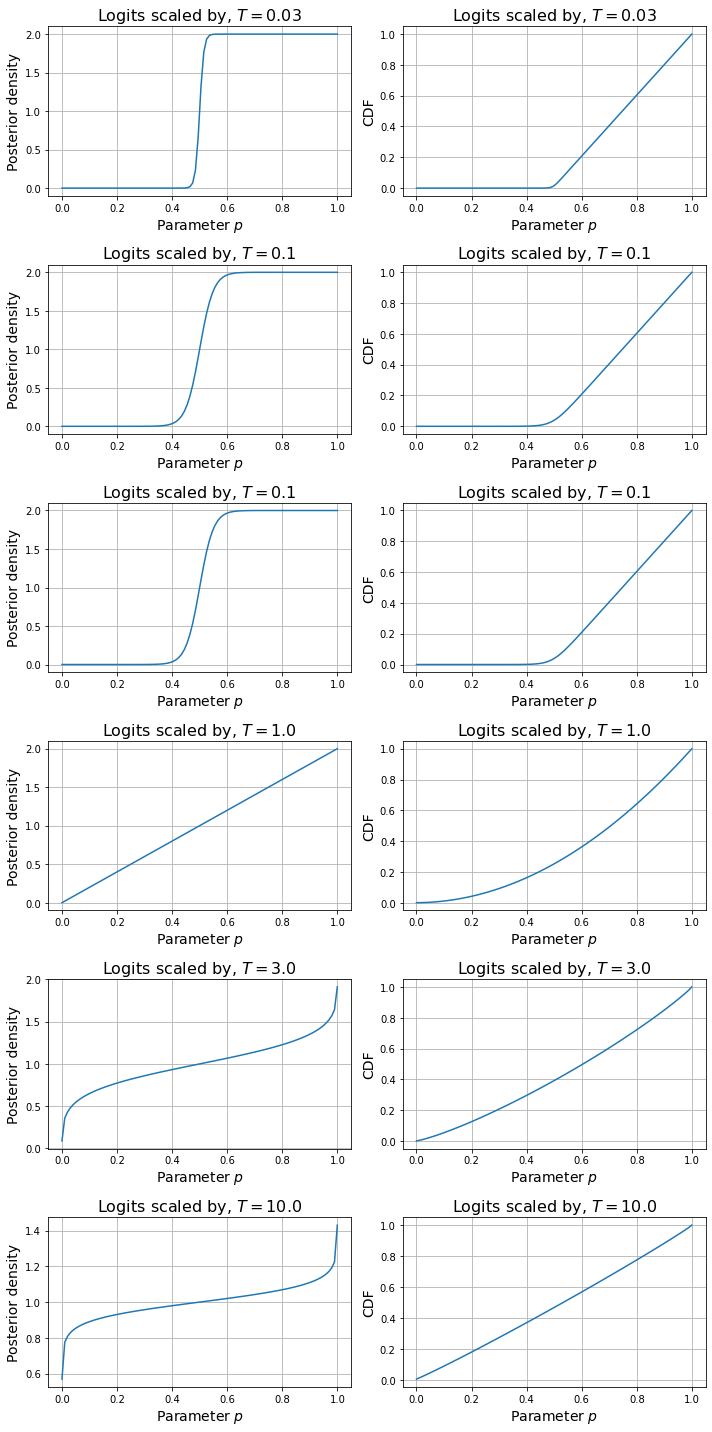

In [10]:
scales = [0.03, 0.1, 0.1, 1., 3., 10.]
f, arr = plt.subplots(len(scales), 2, figsize=(10, 20))
for i, scale in enumerate(scales):
    logits = np.log(zs / (1 - zs))
    logits_scaled = logits / scale
    zs_scaled = np.exp(logits_scaled) / (1 + np.exp(logits_scaled))
    liks_scaled = py_z(zs_scaled)
    posterior_scaled = liks_scaled / np.sum(liks_scaled) * len(zs)
    cdf_scaled = np.cumsum(posterior_scaled) / np.sum(posterior_scaled)

    arr[i, 0].plot(zs, posterior_scaled)
    arr[i, 0].set_xlabel(r"Parameter $p$", fontsize=14)
    arr[i, 0].set_ylabel(r"Posterior density", fontsize=14)
    arr[i, 0].set_title(r"Logits scaled by, $T={}$".format(scale), fontsize=16)
    arr[i, 0].grid()
    
    arr[i, 1].plot(zs, cdf_scaled)
    arr[i, 1].set_xlabel(r"Parameter $p$", fontsize=14)
    arr[i, 1].set_ylabel(r"CDF", fontsize=14)
    arr[i, 1].set_title(r"Logits scaled by, $T={}$".format(scale), fontsize=16)
    arr[i, 1].grid()
plt.tight_layout()

## Final figs

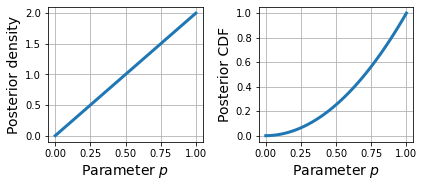

In [36]:
f, arr = plt.subplots(1, 2, figsize=(6, 2.7))

scale = 1.

# for i, scale in enumerate(scales):
logits = np.log(zs / (1 - zs))
logits_scaled = logits / scale
zs_scaled = np.exp(logits_scaled) / (1 + np.exp(logits_scaled))
liks_scaled = py_z(zs_scaled)
posterior_scaled = liks_scaled / np.sum(liks_scaled) * len(zs)
cdf_scaled = np.cumsum(posterior_scaled) / np.sum(posterior_scaled)

arr[0].plot(zs, posterior_scaled, lw=3)
arr[0].set_xlabel(r"Parameter $p$", fontsize=14)
arr[0].set_ylabel(r"Posterior density", fontsize=14)
# arr[0].set_title(r"Logits scaled by $T={}$".format(scale), fontsize=16)
arr[0].grid()

arr[1].plot(zs, cdf_scaled, lw=3)
arr[1].set_xlabel(r"Parameter $p$", fontsize=14)
arr[1].set_ylabel(r"Posterior CDF", fontsize=14)
# arr[1].set_title(r"Logits scaled by $T={}$".format(scale), fontsize=16)
arr[1].grid()

# plt.suptitle(r"Logits scaled by $T={}$".format(scale), fontsize=16)
plt.tight_layout()

plt.savefig("figs/fig2_T1.pdf", bbox_inches="tight")

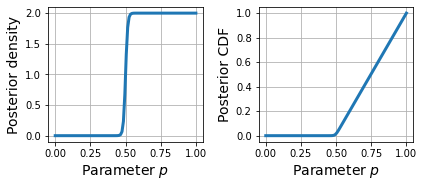

In [37]:
f, arr = plt.subplots(1, 2, figsize=(6, 2.7))

scale = 0.03

# for i, scale in enumerate(scales):
logits = np.log(zs / (1 - zs))
logits_scaled = logits / scale
zs_scaled = np.exp(logits_scaled) / (1 + np.exp(logits_scaled))
liks_scaled = py_z(zs_scaled)
posterior_scaled = liks_scaled / np.sum(liks_scaled) * len(zs)
cdf_scaled = np.cumsum(posterior_scaled) / np.sum(posterior_scaled)

arr[0].plot(zs, posterior_scaled, lw=3)
arr[0].set_xlabel(r"Parameter $p$", fontsize=14)
arr[0].set_ylabel(r"Posterior density", fontsize=14)
# arr[0].set_title(r"Logits scaled by $T={}$".format(scale), fontsize=16)
arr[0].grid()

arr[1].plot(zs, cdf_scaled, lw=3)
arr[1].set_xlabel(r"Parameter $p$", fontsize=14)
arr[1].set_ylabel(r"Posterior CDF", fontsize=14)
# arr[1].set_title(r"Logits scaled by $T={}$".format(scale), fontsize=16)
arr[1].grid()

# plt.suptitle(r"Logits scaled by $T={}$".format(scale), fontsize=16)
plt.tight_layout()

plt.savefig("figs/fig2_T003.pdf", bbox_inches="tight")

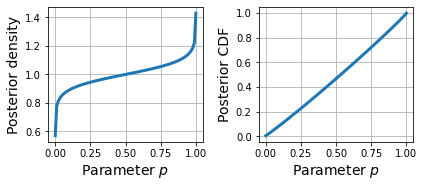

In [38]:
f, arr = plt.subplots(1, 2, figsize=(6, 2.7))

scale = 10.

# for i, scale in enumerate(scales):
logits = np.log(zs / (1 - zs))
logits_scaled = logits / scale
zs_scaled = np.exp(logits_scaled) / (1 + np.exp(logits_scaled))
liks_scaled = py_z(zs_scaled)
posterior_scaled = liks_scaled / np.sum(liks_scaled) * len(zs)
cdf_scaled = np.cumsum(posterior_scaled) / np.sum(posterior_scaled)

arr[0].plot(zs, posterior_scaled, lw=3)
arr[0].set_xlabel(r"Parameter $p$", fontsize=14)
arr[0].set_ylabel(r"Posterior density", fontsize=14)
# arr[0].set_title(r"Logits scaled by $T={}$".format(scale), fontsize=16)
arr[0].grid()

arr[1].plot(zs, cdf_scaled, lw=3)
arr[1].set_xlabel(r"Parameter $p$", fontsize=14)
arr[1].set_ylabel(r"Posterior CDF", fontsize=14)
# plt.suptitle(r"Logits scaled by $T={}$".format(scale), fontsize=16)
arr[1].grid()
plt.tight_layout()

plt.savefig("figs/fig2_T10.pdf", bbox_inches="tight")

In [46]:
from palettable.cmocean.sequential import Thermal_8
import seaborn as sns

sns.set(font_scale=1.5, style='whitegrid')
palette = sns.color_palette(Thermal_8.mpl_colors)

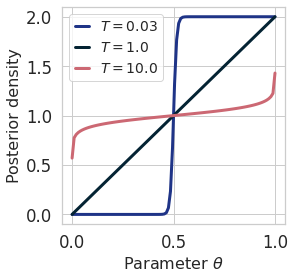

In [64]:
f, arr = plt.subplots(figsize=(4, 4))

for scale, c in zip([0.03, 1., 10.], [palette[1], palette[0], palette[4]]):
# scale = 10.
# for i, scale in enumerate(scales):
    logits = np.log(zs / (1 - zs))
    logits_scaled = logits / scale
    zs_scaled = np.exp(logits_scaled) / (1 + np.exp(logits_scaled))
    liks_scaled = py_z(zs_scaled)
    posterior_scaled = liks_scaled / np.sum(liks_scaled) * len(zs)
    cdf_scaled = np.cumsum(posterior_scaled) / np.sum(posterior_scaled)

    plt.plot(zs, posterior_scaled, lw=3, c=c, label=r"$T={}$".format(scale))
plt.xlabel(r"Parameter $\theta$", fontsize=16)
plt.ylabel(r"Posterior density", fontsize=16)
plt.legend(fontsize=14, handlelength=1)
# arr[0].set_title(r"Logits scaled by $T={}$".format(scale), fontsize=16)
# plt.grid()


plt.savefig("figs/fig2_combined.pdf", bbox_inches="tight")

## 3 classes

In [4]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [6]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

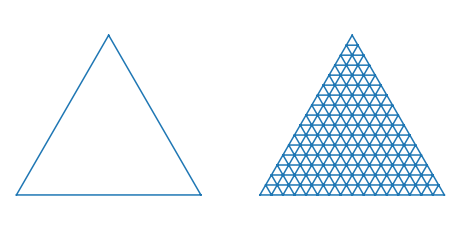

In [7]:
plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

In [8]:
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

In [9]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

In [10]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

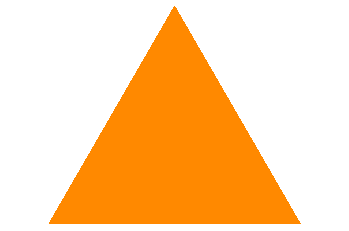

In [11]:
draw_pdf_contours(Dirichlet([1, 1, 1]))